# <div align="center"> Oskar Borkowski <div align="center"> Lab 7   


##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
def linear_regression(filename):
    data_vec, label_vec =load_data(filename) #2
    
    plot_data(data_vec, label_vec) #3
    
    X_train, Y_train, X_test, Y_test = select_training_data(data_vec, 0.3) #4
    
    reg_coefs = LinearRegression().fit(X_train, Y_train) #5
    
    print("linear regression defined by: y = {} x + {}".format(reg_coefs.coef_[0], reg_coefs.intercept_)) #6
    
    Y_pred, Y_diff = predict([X_test, Y_test], reg_coefs) #7
    print(pd.DataFrame({'Expected':Y_test,'Predicted':Y_pred,'Difference':Y_diff}))
    
    plot_test_pred([X_test, Y_test], [X_test, Y_pred], label_vec) #8
    
    MAE = sum(abs(Y_test - Y_pred)) / len(Y_test) #9
    MSE = sum((Y_test - Y_pred) ** 2) / len(Y_test)
    RMSE = np.sqrt(MSE)
    MRE = max(abs((Y_test - Y_pred)/(Y_test)))*100
    print("Mean absolute error: {:.4}".format(MAE))
    print("Mean squared error: {:.4}".format(MSE))
    print("Root mean squared error: {:.4}".format(RMSE))
    print("Max relative error: {:.4}%".format(MRE))
    
def load_data(filename):
    data = pd.read_csv(filename)
    x_label, y_label = data.columns[0], data.columns[1]
    x_vec, y_vec = data[x_label].values.tolist(), data[y_label].values.tolist()
    data_vec = [x_vec, y_vec]
    label_vec = [x_label, y_label]
    return(data_vec, label_vec)

def plot_data(vectors, labels):
    plt.figure()
    plt.scatter(vectors[0], vectors[1])
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.grid()
    plt.show()
    
def plot_test_pred(vectors_t, vectors_p, labels):
    plt.figure()
    plt.scatter(vectors_t[0], vectors_t[1], label = 'Test data')
    plt.plot(vectors_p[0], vectors_p[1], label = 'Prediction')
    plt.legend()
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.grid()
    plt.show()

def select_training_data(data_vec, ratio):
    if not ((ratio < 1) and (ratio > 0)):
        raise("bad size value")
    else:
        X_train, X_test, Y_train, Y_test = train_test_split(data_vec[0], data_vec[1], test_size = ratio)
        X_train = np.array([X_train]).T
        X_test = np.array([X_test]).T
        Y_train = np.array(Y_train).T
        Y_test = np.array(Y_test).T
        return(X_train, Y_train, X_test, Y_test)
    
def predict(vectors, reg_coefs):
    Y_pred = reg_coefs.predict(vectors[0])
    Y_pred = Y_pred.T
    Y_diff = abs(vectors[1] - Y_pred)
    return(Y_pred, Y_diff)

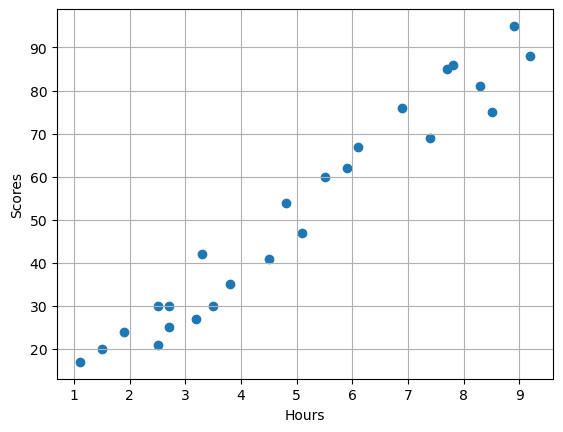

linear regression defined by: y = 9.268232881597717 x + 4.565575962910131
   Expected  Predicted  Difference
0        35  39.784861    4.784861
1        95  87.052849    7.947151
2        21  27.736158    6.736158
3        67  61.101797    5.898203
4        17  14.760632    2.239368
5        47  51.833564    4.833564
6        62  59.248150    2.751850
7        85  75.930969    9.069031


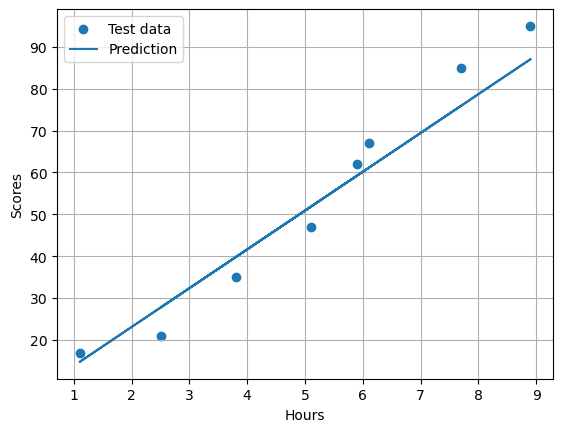

Mean absolute error: 5.533
Mean squared error: 35.55
Root mean squared error: 5.963
Max relative error: 32.08%


In [3]:
linear_regression("SCORES.csv")

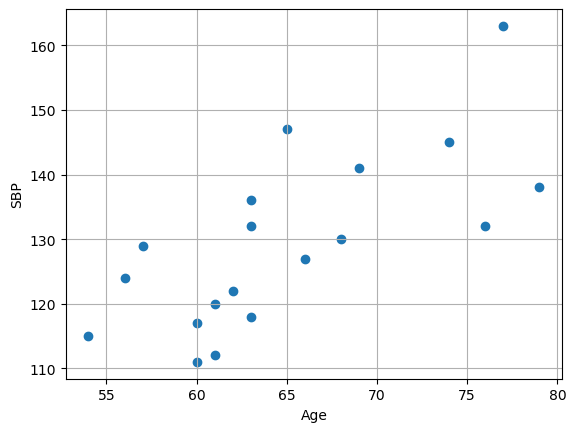

linear regression defined by: y = 1.415935499170026 x + 38.37467393881907
   Expected   Predicted  Difference
0       141  136.074223    4.925777
1       122  126.162675    4.162675
2       136  127.578610    8.421390
3       112  124.746739   12.746739
4       115  114.835191    0.164809
5       132  145.985772   13.985772


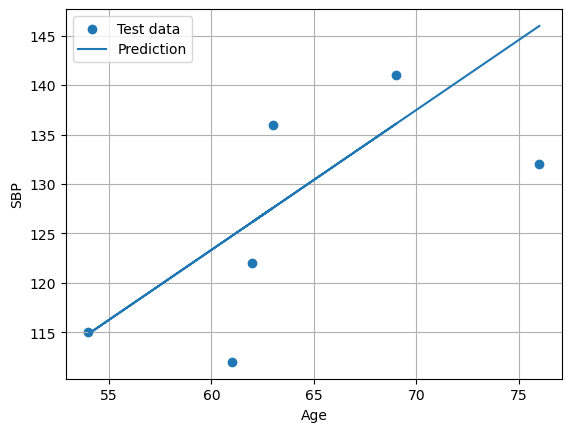

Mean absolute error: 7.401
Mean squared error: 78.44
Root mean squared error: 8.856
Max relative error: 11.38%


In [4]:
linear_regression("SBP.csv")

Characteristic of data provided by SCORE.csv is highly linear, and so the prediction gives good aproximation.
Data from SBP.csv is spread out and even with a human intuiton its hard to draw a single line that would yield a good predictions.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [5]:
petrol_data = pd.read_csv("PETROL.csv")
x_vec = petrol_data[['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy']].values.tolist()
y_vec = petrol_data['Zuzycie_paliwa'].values.tolist()
#X_train, X_test, Y_train, Y_test = select_training_data([x_vec, y_vec], 0.3)
X_train, X_test, Y_train, Y_test = train_test_split(x_vec, y_vec, test_size = 0.3)
reg_coefs = LinearRegression().fit(X_train, Y_train)
print("linear regression defined by: y = {} x + {}".format(reg_coefs.coef_[0], reg_coefs.intercept_))
Y_pred, Y_diff = predict([X_test, Y_test], reg_coefs)
print(pd.DataFrame({'Expected':Y_test,'Predicted':Y_pred,'Difference':Y_diff}))
MAE = sum(abs(Y_test - Y_pred)) / len(Y_test) #9
MSE = sum((Y_test - Y_pred) ** 2) / len(Y_test)
RMSE = np.sqrt(MSE)
MRE = max(abs((Y_test - Y_pred)/(Y_test)))*100
print("Mean absolute error: {:.4}".format(MAE))
print("Mean squared error: {:.4}".format(MSE))
print("Root mean squared error: {:.4}".format(RMSE))
print("Max relative error: {:.4}%".format(MRE))

linear regression defined by: y = -31.224360803144833 x + 331.03691411832693
    Expected   Predicted  Difference
0        635  599.785323   35.214677
1        541  527.770914   13.229086
2        699  628.499816   70.500184
3        640  626.890943   13.109057
4        457  457.949543    0.949543
5        640  685.263167   45.263167
6        782  719.230622   62.769378
7        631  606.167311   24.832689
8        632  645.348254   13.348254
9        467  506.457637   39.457637
10       525  566.918316   41.918316
11       561  584.372079   23.372079
12       414  504.513150   90.513150
13       540  583.925615   43.925615
14       577  584.788236    7.788236
Mean absolute error: 35.08
Mean squared error: 1.826e+03
Root mean squared error: 42.73
Max relative error: 21.86%


The squared error has alarming high value (mostly due to high numbers to operate in first place), in additon to other errors and relative one, all together are indicating that linear regression for this model is probably not the best choice.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [6]:
data = pd.read_csv("HEART.csv")
data.replace('?', np.nan, inplace = True)
data.drop(['slope', 'ca', 'thal'], axis = 1, inplace = True)
data.dropna(inplace = True)
final_data = pd.get_dummies(data, columns = ['cp', 'restecg'])

x_vec = np.array(final_data[['age', 'sex', 'trestbps', 'chol', \
                        'fbs', 'thalach', 'exang', 'oldpeak', \
                        'cp_1', 'cp_2', 'cp_3', 'cp_4', \
                        'restecg_0', 'restecg_1', 'restecg_2']])
y_vec = np.array(final_data[final_data.columns[8]])

X_train, X_test, Y_train, Y_test = train_test_split(x_vec, y_vec, test_size = 0.2)

logistic_reg_coefs = LogisticRegression(max_iter = 1000).fit(X_train, Y_train) 
print(classification_report(Y_test, logistic_reg_coefs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        28
           1       1.00      0.72      0.84        25

    accuracy                           0.87        53
   macro avg       0.90      0.86      0.86        53
weighted avg       0.89      0.87      0.86        53

